#Part-1
Questions:
1. take W = 5,6,...,30 and consider your data for year 1. For each W in the specified range, compute your average P/L per trade and plot it: on x-axis you plot the values of W and on the y axis you plot profit and loss per trade. What is the optimal value W∗ of W?
2. use the value of W ∗ from year 1 and consider year 2. For every day in year 2, take the previous W∗ days, compute linear regression and compute the value of r2 for that day. Plot the graph of r2 for year 2. What is the average r2. How well does it explain price movements?
3. take the optimal value of W ∗ from year 1 and use it to implement the above trading strategy for year 2. How many ”long position” and ’short position” transactions did you have in year 2?
4. what is the average profit/loss per ”long position” trade and per ”short position” trades in year 2?
5. what is the average number of days for long position and short position transactions in year 2?
6. are these results very different from those in year 1 for this value of W∗?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/BOC.csv')

In [3]:
df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2017-06-13,2017,6,13,Tuesday,24,2017-24,22.00,22.00,22.00,22.00,100,22.00,0.000000,22.000000,22.0000
1,2017-06-14,2017,6,14,Wednesday,24,2017-24,22.00,22.00,22.00,22.00,0,22.00,0.000000,22.000000,22.0000
2,2017-06-15,2017,6,15,Thursday,24,2017-24,22.00,22.00,22.00,22.00,0,22.00,0.000000,22.000000,22.0000
3,2017-06-16,2017,6,16,Friday,24,2017-24,13.00,14.99,12.96,13.20,444100,13.20,-0.400000,19.800000,19.8000
4,2017-06-19,2017,6,19,Monday,25,2017-25,17.26,18.84,13.27,13.56,87600,13.56,0.027273,18.552000,18.5520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2021-12-23,2021,12,23,Thursday,51,2021-51,28.70,29.30,28.30,29.23,81000,29.23,0.034690,28.075714,31.9574
1143,2021-12-27,2021,12,27,Monday,52,2021-52,29.48,29.75,28.83,29.33,94900,29.33,0.003421,28.134286,31.7998
1144,2021-12-28,2021,12,28,Tuesday,52,2021-52,29.18,29.67,28.47,28.73,77700,28.73,-0.020457,28.131429,31.6278
1145,2021-12-29,2021,12,29,Wednesday,52,2021-52,28.80,29.22,28.33,28.48,74200,28.48,-0.008702,28.073571,31.4724


In [4]:
df[-504:-251]

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
643,2020-01-02,2020,1,2,Thursday,0,2020-00,21.15,21.40,20.81,21.38,33600,21.38,0.016160,21.149286,21.4500
644,2020-01-03,2020,1,3,Friday,0,2020-00,21.19,21.61,21.19,21.49,20300,21.49,0.005145,21.172143,21.4818
645,2020-01-06,2020,1,6,Monday,1,2020-01,21.47,21.66,21.26,21.60,30300,21.60,0.005119,21.166429,21.5150
646,2020-01-07,2020,1,7,Tuesday,1,2020-01,21.55,21.68,21.37,21.42,22500,21.42,-0.008333,21.179286,21.5476
647,2020-01-08,2020,1,8,Wednesday,1,2020-01,21.42,21.85,21.25,21.63,42700,21.63,0.009804,21.226429,21.5856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2020-12-24,2020,12,24,Thursday,51,2020-51,25.87,26.54,25.84,26.01,43300,26.01,0.016016,24.037143,20.5550
892,2020-12-28,2020,12,28,Monday,52,2020-52,26.01,27.19,25.95,26.88,121800,26.88,0.033449,24.267857,20.7450
893,2020-12-29,2020,12,29,Tuesday,52,2020-52,26.90,26.94,25.94,26.32,66500,26.32,-0.020833,24.491429,20.9176
894,2020-12-30,2020,12,30,Wednesday,52,2020-52,26.35,27.93,26.27,27.15,66000,27.15,0.031535,24.800000,21.1204


In [5]:
df1 = df[-504:-251] #year1 : 2020

In [6]:
train = df1['Adj Close']
train = train.reset_index()
prices = train['Adj Close']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
def linReg(prices, w):
  p = 0 #(0 for no position, 1 for long, 2 for short)
  shares_B = 0
  shares_S = 0
  pnl = []
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_test = prices[i+w]
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_train= x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    last_p = y_train[i+w-1]


    if y_pred > last_p:
      if p == 0:
        shares_B += 100/last_p
        p = 1
      
      if p == 2:
        pnl.append(100 - shares_S*last_p)
        p = 0
      i+=1

    if y_pred < last_p:
      if p == 0:
        shares_S += 100/last_p
        p == 2
      
      if p == 1:
        pnl.append(shares_B*last_p - 100)
        p=0
      i+=1

  return sum(pnl)/len(pnl)





In [9]:
#Q1
res = []
for i in range(5,31):
  res.append(linReg(prices, i))

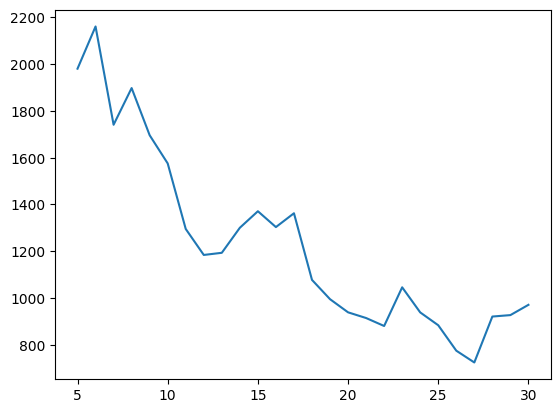

In [66]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(5,31)], res)
plt.show()

In [10]:
res

[1980.2462509395646,
 2160.582926258358,
 1740.69784387884,
 1897.444861920496,
 1695.8908169421054,
 1575.4519096568001,
 1295.4816092338383,
 1184.400139291814,
 1193.5862825246493,
 1300.5709165255753,
 1371.1691080546207,
 1303.5023756820806,
 1362.522338887428,
 1077.8379027438643,
 995.4246967497005,
 939.242006698171,
 914.908325193667,
 880.8738673228862,
 1046.1364104288095,
 938.939095743148,
 884.0361294563438,
 775.4259498920466,
 724.9903334417899,
 921.2322634427284,
 927.3836007016325,
 971.2787523702058]

In [11]:
#optimal w = 6

In [12]:
#Q2
df2 = df[-251:]
train = df2['Adj Close']
train = train.reset_index()
prices = train['Adj Close']

In [13]:
def r_2(prices, w):
  p = 0 #(0 for no position, 1 for long, 2 for short)
  shares_B = 0
  shares_S = 0
  r2 = []

  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_test = prices[i+w]
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_train= x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    r2.append(model.score(x_train,y_train))
  return r2

In [14]:
r_2(prices, 6)

[0.06513485847597034,
 0.8447613189357945,
 0.9415287991732968,
 0.8132654380979482,
 0.815499351941058,
 0.15418626600880037,
 0.005367626502655987,
 0.4411737451737462,
 0.6965754070041353,
 0.8511816603660076,
 0.9041691806401451,
 0.78997843391787,
 0.4590126233588997,
 0.017164614009870127,
 0.08861772321905492,
 0.33453406853998535,
 0.7237197306272773,
 0.8999654580288439,
 0.929229094091922,
 0.9002055885252122,
 0.9564368636519843,
 0.8535997618197765,
 0.5388291270169638,
 0.32641906234586426,
 0.25587181590670205,
 0.5017658572884475,
 0.8079945977841334,
 0.9301060016818025,
 0.8726563278479889,
 0.25511817031931694,
 0.015915458801508797,
 0.4738860789919661,
 0.7799162756545108,
 0.14750681231900953,
 0.007991586058209266,
 0.0002922957180104824,
 0.0406139301895887,
 0.4710494540795035,
 0.8789183426489122,
 0.14846835201471664,
 0.11640017919634249,
 0.8222293832480682,
 0.8811403360419764,
 0.6444924789310054,
 0.002507333562135061,
 0.3753929286849089,
 0.880728555011

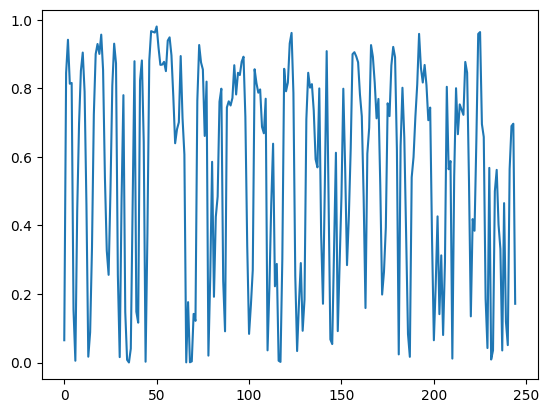

In [67]:
plt.plot([x for x in range(len(r_2(prices, 6)))], r_2(prices, 6))
plt.show()

In [15]:
#Q3
def q3(prices, w):
  p = 0 #(0 for no position, 1 for long, 2 for short)
  shares_B = 0
  shares_S = 0
  pnl = []
  l = s = 0
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_test = prices[i+w]
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_train= x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    last_p = y_train[i+w-1]


    if y_pred > last_p:
      if p == 0:
        shares_B += 100/last_p
        p = 1
      
      if p == 2:
        pnl.append(100 - shares_S*last_p)
        p = 0
      i+=1
      l+=1

    if y_pred < last_p:
      if p == 0:
        shares_S += 100/last_p
        p == 2
      
      if p == 1:
        pnl.append(shares_B*last_p - 100)
        p=0
      i+=1
      s+=1

  return [l,s]

In [16]:
q3(prices,6)

[120, 125]

In [17]:
#q4
def q4(prices, w):
  p = 0 #(0 for no position, 1 for long, 2 for short)
  shares_B = 0
  shares_S = 0
  pnl = []
  l = s = []
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_test = prices[i+w]
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_train= x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    last_p = y_train[i+w-1]


    if y_pred > last_p:
      if p == 0:
        shares_B += 100/last_p
        p = 1
      
      if p == 2:
        l.append(100 - shares_S*last_p)
        p = 0
      i+=1

    if y_pred < last_p:
      if p == 0:
        shares_S += 100/last_p
        p == 2
      
      if p == 1:
        s.append(shares_B*last_p - 100)
        p=0
      i+=1

  return [sum(l),sum(s)]

In [18]:
l_avg = q4(prices,6)[0]/120
s_avg = q4(prices, 6)[1]/125

In [19]:
l_avg

473.20735917295144

In [20]:
s_avg

454.2790648060334

#Part-2

In this assignment you will implement and compare three poly- nomial functions (line - degree d = 1, quadratic - degree d = 2 and cubic - degree d = 3) for predicting next week labels based on the previous W weekly closing prices. Recall that a weekly closing price for week i is the (adjusted) closing price Pi for the last trading day day of that week.
Assume that you are given W and you have weekly closing prices P1,...,PW for weeks 1,...,W. You want to predict a label (”red” or ”green”) for week W + 1 using a polynomial model of degree d fitted on prices P1,...,PW.
You proceed as follows. Construct a polynomial model of de-
gree d to fit P1,...,PW and use this model to predict price
P∗ for week W +1. Then assign a label to week W +1 W+1
 based on the following three cases:
1. P∗ > PW: week W +1 ia assigned a ”green” color (you
W+1
predict next week closing price is higher than current, and
therefore, you want to be invested)
2. P∗ < PW: week W + 1 ia assigned a ”red” color (you
W+1
predict next week closing price to be lower than the current
price, and therefore, you want to remain in cash)
3. P∗ = PW: week W + 1 ia assigned the same color as W+1
week W

Questions:
1. take weekly data for year 1. For each W = 5,6,...,12 and for each d = 1, 2, 3 construct the corresponding polynomials Use these polynomials to predict weekly labels. Plot the accuracy - on x axis you have W and you plot three curves for accuracy (separate curve for each d)
2. for each d take the best W that gives you the highest accu- racy. Use this W to predict labels for year 2. What is your accuracy?
3. compute confusion matrices (for each d) for year 2
4. implement three trading strategies for year 2 (for each d using the ”best” values for W from year 1 that you have computed)

In [21]:
data1 = df[-504:-251]
data2 = df[-251:]

In [22]:
data1 = data1.reset_index()
data2 = data2.reset_index()

In [23]:
data1

,index,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,643,2020-01-02,2020,1,2,Thursday,0,2020-00,21.15,21.40,20.81,21.38,33600,21.38,0.016160,21.149286,21.4500
1,644,2020-01-03,2020,1,3,Friday,0,2020-00,21.19,21.61,21.19,21.49,20300,21.49,0.005145,21.172143,21.4818
2,645,2020-01-06,2020,1,6,Monday,1,2020-01,21.47,21.66,21.26,21.60,30300,21.60,0.005119,21.166429,21.5150
3,646,2020-01-07,2020,1,7,Tuesday,1,2020-01,21.55,21.68,21.37,21.42,22500,21.42,-0.008333,21.179286,21.5476
4,647,2020-01-08,2020,1,8,Wednesday,1,2020-01,21.42,21.85,21.25,21.63,42700,21.63,0.009804,21.226429,21.5856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,891,2020-12-24,2020,12,24,Thursday,51,2020-51,25.87,26.54,25.84,26.01,43300,26.01,0.016016,24.037143,20.5550
249,892,2020-12-28,2020,12,28,Monday,52,2020-52,26.01,27.19,25.95,26.88,121800,26.88,0.033449,24.267857,20.7450
250,893,2020-12-29,2020,12,29,Tuesday,52,2020-52,26.90,26.94,25.94,26.32,66500,26.32,-0.020833,24.491429,20.9176
251,894,2020-12-30,2020,12,30,Wednesday,52,2020-52,26.35,27.93,26.27,27.15,66000,27.15,0.031535,24.800000,21.1204


In [24]:
weekly_closing = []
for i in range(1,len(data1)):
  if data1['Week_Number'][i] != data1['Week_Number'][i-1]:
    weekly_closing.append(data1['Adj Close'][i-1])

In [25]:
weekly_closing2 = []
for i in range(1,len(data2)):
  if data2['Week_Number'][i] != data2['Week_Number'][i-1]:
    weekly_closing2.append(data2['Adj Close'][i-1])

In [26]:
weekly_closing.append(data1['Adj Close'][252]) #last closing price
weekly_closing2.append(data2['Adj Close'][len(data2)-1])

In [27]:
len(weekly_closing)

53

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
weekly_closing

[21.49,
 20.88,
 20.71,
 20.65,
 20.18,
 20.59,
 20.43,
 20.45,
 19.46,
 17.59,
 14.67,
 16.15,
 17.19,
 16.18,
 17.99,
 16.65,
 16.21,
 15.8,
 18.46,
 17.98,
 18.6,
 16.32,
 16.35,
 15.45,
 15.87,
 14.61,
 15.75,
 15.18,
 15.73,
 15.91,
 15.9,
 16.15,
 16.35,
 16.99,
 16.91,
 15.87,
 16.27,
 15.8,
 15.5,
 16.38,
 17.53,
 17.69,
 17.63,
 15.98,
 16.86,
 19.75,
 21.61,
 22.82,
 23.5,
 22.95,
 25.79,
 26.01,
 27.65]

In [30]:
def model1(prices, w):

  y_true = []
  y_pred = []

  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_true.append(prices[i+w])
    
    degree = 1
    weights1 = np.polyfit(x_train, y_train, degree)
    m1 = np.poly1d(weights1)
    y_pred.append(m1(x_test))
  
  r2 = r2_score(y_true, y_pred)
  return r2


In [31]:
r2_1 = []
for i in range(5,13):
  r2_1.append(model1(weekly_closing, i))

In [32]:
r2_1

[0.7525010599343914,
 0.7407444382520383,
 0.758548504536003,
 0.7681050306752747,
 0.7749373245526138,
 0.776908993987037,
 0.7890911734560733,
 0.7645727607010471]

In [33]:
def model2(prices, w):
  y_true = []
  y_pred = []
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_true.append(prices[i+w])
    
    degree = 2
    weights1 = np.polyfit(x_train, y_train, degree)
    m1 = np.poly1d(weights1)
    y_pred.append(m1(x_test))
  
  r2 = r2_score(y_true, y_pred)
  return r2

In [34]:
r2_2 = []
for i in range(5,13):
  r2_2.append(model2(weekly_closing, i))

In [35]:
r2_2

[0.6074137473725472,
 0.623486218147089,
 0.5867259200656019,
 0.6093982282412667,
 0.6458905695447545,
 0.7039755273133272,
 0.7601122553276144,
 0.7851475031781109]

In [36]:
def model3(prices, w):
  y_true = []
  y_pred = []
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_true.append(prices[i+w])
    
    degree = 3
    weights1 = np.polyfit(x_train, y_train, degree)
    m1 = np.poly1d(weights1)
    y_pred.append(m1(x_test))
  
  r2 = r2_score(y_true, y_pred)
  return r2

In [37]:
r2_3 = []
for i in range(5,13):
  r2_3.append(model3(weekly_closing, i))

In [38]:
r2_3

[-0.02153049386062378,
 0.19445101782539087,
 0.3625316201353641,
 0.3052434214809385,
 0.34318081228877617,
 0.38259318405912524,
 0.44303555569048414,
 0.5831160195315868]

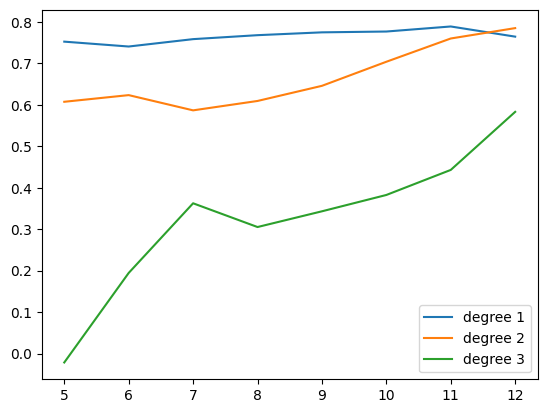

In [39]:
import matplotlib.pyplot as plt
plt.plot([5,6,7,8,9,10,11,12], r2_1, label = "degree 1")
plt.plot([5,6,7,8,9,10,11,12], r2_2, label = "degree 2")
plt.plot([5,6,7,8,9,10,11,12], r2_3, label = "degree 3")
plt.legend()
plt.show()

In [40]:
#Ques2
'''
for d = 1, w = 11
for d = 2, w = 12
for d = 3, w = 12
'''

'\nfor d = 1, w = 11\nfor d = 2, w = 12\nfor d = 3, w = 12\n'

In [41]:
def best(prices, w, degree):
  y_true = []
  y_pred = []
  for i in range(len(prices)-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_true.append(prices[i+w])
  
    weights1 = np.polyfit(x_train, y_train, degree)
    m1 = np.poly1d(weights1)
    y_pred.append(m1(x_test))
  
  r2 = r2_score(y_true, y_pred)
  return [r2, y_pred]

In [42]:
#deg1
acc1 = best(weekly_closing2, 11, 1)[0]
ypred1 = best(weekly_closing2, 11, 1)[1]

In [43]:
#deg2
acc2 = best(weekly_closing2, 12, 2)[0]
ypred2 = best(weekly_closing2, 12, 2)[1]

In [44]:
#deg3
acc3 = best(weekly_closing2, 12, 3)[0]
ypred3 = best(weekly_closing2, 12, 3)[1]

In [45]:
def gen_label(prices, w, degree):
  l = []
  for i in range(52-w):
    x_train = [j for j in range(w)]
    y_train = prices[i:i+w]
    x_test = w
    y_test = prices[i+w]
  
    weights1 = np.polyfit(x_train, y_train, degree)
    m1 = np.poly1d(weights1)
    y_pred = m1(x_test)
    pw = y_train[-1]

    if y_pred > pw:
      l.append('green')
    
    elif y_pred < pw:
      l.append('red')
    
    else:
      l.append(l[-1])

  
  return l

In [46]:
def gen_truelabel(p, w):
  l = []
  for i in range(52-w):
    x_train = [j for j in range(w)]
    y_train = p[i:i+w]
    x_test = w
    y_test = p[i+w]
  
    pw = y_train[-1]

    if y_test > pw:
      l.append('green')
      i+=1
    
    elif y_test < pw:
      l.append('red')
      i+=1
    
    else:
      l.append(l[-1])
      i+=1
  
  return l

In [47]:
label_deg1 = gen_label(weekly_closing2, 11, 1)
label_deg2 = gen_label(weekly_closing2, 12, 2)
label_deg3 = gen_label(weekly_closing2, 12, 3)

In [48]:
true_w11 = gen_truelabel(weekly_closing2, 11)
true_w12 = gen_truelabel(weekly_closing2, 12)

In [64]:
from sklearn.metrics import accuracy_score
a1 = accuracy_score(true_w11, label_deg1)
a2 = accuracy_score(true_w12, label_deg2)
a3 = accuracy_score(true_w12, label_deg3)

In [65]:
print(a1, a2, a3)

0.5121951219512195 0.575 0.325


In [49]:
len(true_w11)

41

In [50]:
len(label_deg1)

41

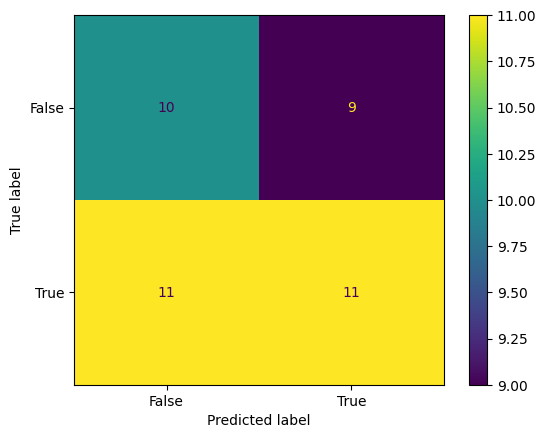

In [51]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(true_w11, label_deg1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

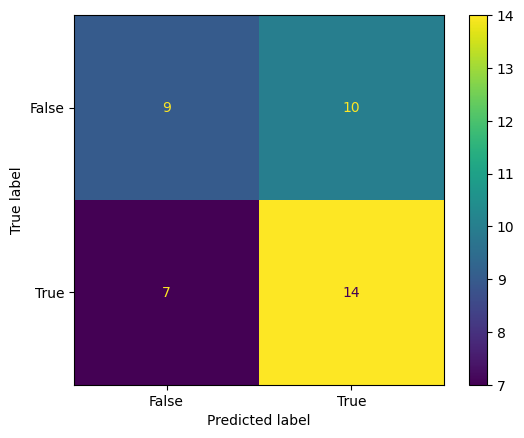

In [52]:
confusion_matrix = metrics.confusion_matrix(true_w12, label_deg2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

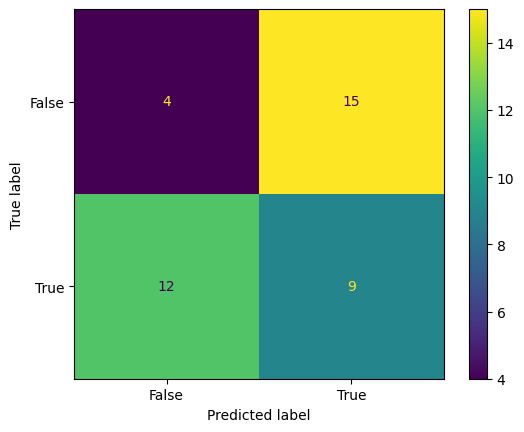

In [53]:
confusion_matrix = metrics.confusion_matrix(true_w12, label_deg3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#Part-3

1. take years 1 and 2. For each month, compute the ”candi- date” days and decide whether there is a significant change of pricing trend in each month. Use 0.1 as critical value.
2. how many months exhibit significant price changes for your sotck ticker.
3. are there more ”changes” in year 1 or in year 2?

In [54]:
from scipy.stats import f as fisher_f

In [55]:
def calcSse(monthly_data):
  x_train = [j for j in range(len(monthly_data))]
  y_train = monthly_data

  weights1 = np.polyfit(x_train, y_train, 1)
  m1 = np.poly1d(weights1)
  y_pred = m1(x_train)

  rmse = np.sqrt(mean_squared_error(y_train, y_pred))
  sse = (rmse**2)*len(y_train)
  return sse

In [56]:
d1 = []
x = []
for i in range(1, len(data1)):
  if data1['Month'][i-1] == data1['Month'][i]:
    x.append(data1['Adj Close'][i-1])
    if i == len(data1)-1:
      d1.append(x)
  else:
    x.append(data1['Adj Close'][i-1])
    d1.append(x)
    x = []

In [57]:
d2 = []
x = []
for i in range(1, len(data2)):
  if data2['Month'][i-1] == data2['Month'][i]:
    x.append(data2['Adj Close'][i-1])
    if i == len(data2)-1:
      d2.append(x)
  else:
    x.append(data2['Adj Close'][i-1])
    d2.append(x)
    x = [] 

In [58]:
def candidate(x):
  min_k = 0
  sse = calcSse(x)
  min_sse = 10000000000
  l1 = l2 = 1000000000

  for i in range(2,len(x)-2):
    k = i
    part1 = x[:k]
    part2 = x[k:]
    s1 = calcSse(part1)
    s2 = calcSse(part2)
    if s1+s2 < min_sse:
      min_sse = s1+s2
      min_k = k
      l1 = s1
      l2 = s2
  
  f = ((sse - (l1+l2))*(12-4))/(l1+l2)
  p_value = fisher_f.cdf(f , 2, 8)
  if p_value > 0.1:
    return min_k
  else:
    return 0

  


In [59]:
k1 = []
k2 = []
for i in range(len(d1)):
  x = d1[i]
  k1.append(candidate(x))
for j in range(len(d2)):
  y = d2[i]
  k2.append(candidate(y))

In [60]:
k1

[5, 8, 11, 13, 4, 19, 9, 15, 13, 9, 15, 13]

In [61]:
k2

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

In [62]:
len(d1)

12